In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
# import data
data = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv', header = None)

In [3]:
# Get the X matrix
x = np.c_[np.ones(300),data[[0,1]]]
# Compute the inverse of (X^T X)
xt = x.transpose()
xtx = np.matmul(xt, x)
xtxi = np.linalg.inv(xtx)
# Computer beta
beta = np.matmul(np.matmul(xtxi, xt), np.array(data[2]))

In [4]:
beta

array([-19.2937528 ,  -8.0672204 ,  -1.77801157])

In [5]:
# compute fitted y
fit_y = np.matmul(x, beta)
# prepare data for visulization
x_surf, y_surf = np.meshgrid(np.linspace(data[0].min(), data[0].max(), 30), np.linspace(data[1].min(), data[1].max(), 10))
onlyx = pd.DataFrame({'A': x_surf.ravel(), 'B': y_surf.ravel()})

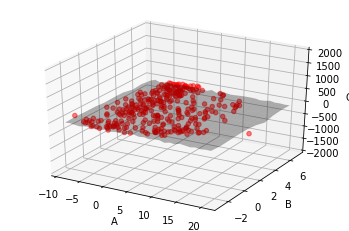

In [6]:
# plot of data points and regression model
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[0], data[1], data[2], c = 'red', marker = 'o', alpha = 0.5)
ax.plot_surface(x_surf, y_surf, fit_y.reshape(x_surf.shape), color = 'None', alpha = 0.3)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.set_zlim(-2000, 2000)
plt.show()